In [51]:
import pandas as pd
import nltk
import spacy
from spacy import displacy
from collections import Counter
import pprint

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=4)
df = pd.read_csv('datasets/wiki_movie_plots_deduped.csv')
df

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
5,1903,Alice in Wonderland,American,Cecil Hepworth,May Clark,unknown,https://en.wikipedia.org/wiki/Alice_in_Wonderl...,"Alice follows a large white rabbit down a ""Rab..."
6,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...
7,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...
8,1905,The Little Train Robbery,American,Edwin Stanton Porter,NaN,unknown,https://en.wikipedia.org/wiki/The_Little_Train...,The opening scene shows the interior of the ro...
9,1905,The Night Before Christmas,American,Edwin Stanton Porter,NaN,unknown,https://en.wikipedia.org/wiki/The_Night_Before...,Scenes are introduced using lines of the poem....


In [60]:
df_ethnicity = df[df["Origin/Ethnicity"] != 'American']
df_ethnicity['Origin/Ethnicity'].max()
len(df[df['Origin/Ethnicity'] == 'British'])

## Reconocimiento de Entidades

Para hacer análisis de las sinopsis de cada película, se hizo un Reconocimiento de Entidades (con [Spacy](https://spacy.io/)).
A continuación, se muestra un ejemplo del nuevo entities.csv (El script con el cual se realizó se llama entity_recognition.py)

3670

In [5]:
df_entities = pd.read_csv('new_entities.csv')

### Filtrado de Entidades

En el siguiente bloque se pueden obtener respuestas a preguntas tales como: ¿Cuál es el lugar (país, ciudad, etc.) más nombrado en las películas? ¿Cuál es el nombre de persona más común en una película?

In [31]:
# Filtramos por lugares
df_places = df_entities[df_entities.entity == 'GPE']

# ordenamos por número de apariciones en orden descendiente
df_places = df_places.sort_values(by='count', ascending=False)

df_places.head()

,phrase,entity,count
1128,London,GPE,2432
248,New York,GPE,1959
741,India,GPE,1751
252,New York City,GPE,1355
79,Paris,GPE,1348


In [50]:
# Filtramos por nombres
df_person = df_entities[df_entities.entity == 'PERSON']

# ordenamos por número de apariciones en orden descendiente
df_person = df_person.sort_values(by='count', ascending=False)

print('Número total de nombres distintos:', len(df_person))
df_person.head()


Número total de nombres distintos: 140476


,phrase,entity,count
217,Tom,PERSON,5676
19,Jack,PERSON,4638
321,John,PERSON,3820
247,Joe,PERSON,3775
1237,David,PERSON,3230


## Gráficas de datos generales

### Número de películas por país:

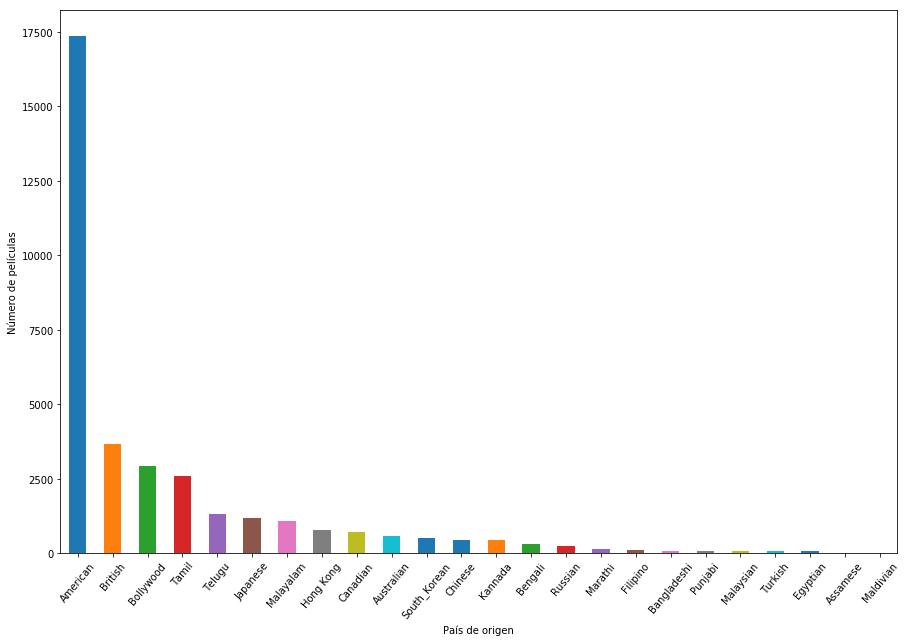

In [61]:
# Groupby Origin/Ethnicity
country = df.groupby("Origin/Ethnicity")

plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("País de origen")
plt.ylabel("Número de películas")
plt.show()

### Número de películas por país (que no son de EUA):

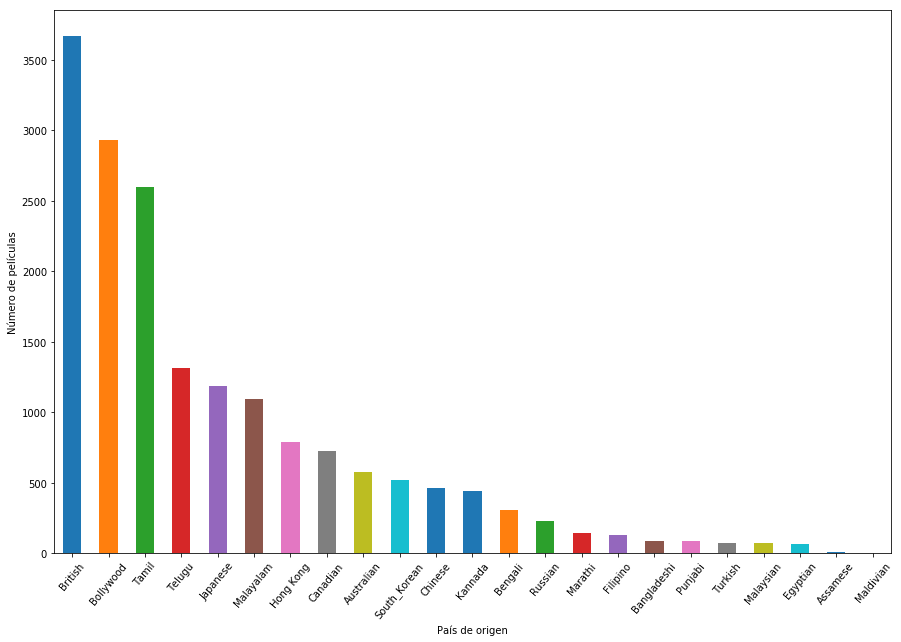

In [64]:
df_no_america = df[df['Origin/Ethnicity'] != 'American']

# Groupby Origin/Ethnicity
country = df_no_america.groupby("Origin/Ethnicity")

plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("País de origen")
plt.ylabel("Número de películas")
plt.show()

## Wordclouds

Con la librería de [WordCloud](https://amueller.github.io/word_cloud/index.html) se generaran algunas imágenes intuitivas para ver cuáles son las palabras que más se repiten.

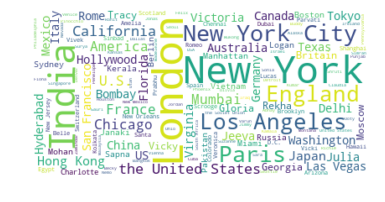

In [71]:
# Ahora generamos un diccionario con los lugares y sus frecuencias para generar una imagen de tipo WordCloud
places_dict = {}
for index, row in df_places.iterrows():
    places_dict[row['phrase']] = float(row['count'])

wordcloud = WordCloud(max_font_size=50, background_color="white").generate_from_frequencies(places_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

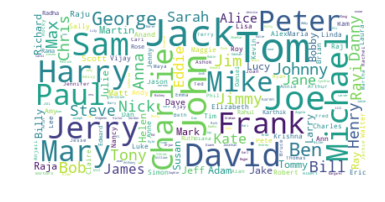

In [72]:
# Ahora sigue un diccionario con los nombres y sus frecuencias para generar una imagen de tipo WordCloud
person_dict = {}
for index, row in df_person.iterrows():
    person_dict[row['phrase']] = float(row['count'])
    
wordcloud = WordCloud(max_font_size=50, background_color="white").generate_from_frequencies(person_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()